In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 


In [24]:
patients_df = pd.read_excel('pt characteristics.xls', index_col=None, na_values=('NA'))
patients_df['PreRT Skeletal Muscle status'].replace(['SM depleted', 'SM not depleted'], [1,0], inplace=True)
patients_df['Sex'].replace(['Female', 'Male'], [1,0], inplace=True)
patients_df['PostRT Skeletal Muscle status'].replace(['SM depleted', 'SM not depleted'], [1,0], inplace=True)

In [25]:
patients_df.shape

(215, 83)

In [26]:
patients_df

,TCIA code,Sex,Age,Date of Birth,Diag,Site,Histology,Grade,T,N,...,Pre-RT Imaging Date,Pre-RT Imaging Modality,CT sim date,post-RT imaging date,post-RT imaging modality,Recurrence imaging date,Recurrence imaging modality,Additional imaging date,Additional imaging modality,Additional imaging notes
0,HNSCC-01-0001,1,54,NaN,CA soft palate,Oropharynx,SCC,moderately to poorly diff.,2,2c,...,1998-12-01,PET/CT,1998-12-05,1999-03-27,PET/CT,NaT,NaN,NaN,NaN,NaN
1,HNSCC-01-0002,1,56,NaN,NPC,Nasopharynx,SCC,moderately diff.,4,2,...,2001-10-01,PET/CT,2001-11-20,2003-12-03,PET/CT,2004-10-19,MRI Orbits,NaN,NaN,NaN
2,HNSCC-01-0003,0,48,NaN,CA tonsil,Oropharynx,SCC,moderately diff.,2,2b,...,2001-10-30,PET/CT,2001-11-20,2002-06-09,PET/CT,NaT,NaN,NaN,NaN,NaN
3,HNSCC-01-0004,0,65,NaN,CA tonsil,Oropharynx,SCC,poorly diff.,4a,2c,...,1996-08-28,PET/CT,1996-08-24,1997-05-11,PET/CT,NaT,NaN,NaN,NaN,NaN
4,HNSCC-01-0005,0,66,NaN,CA tonsil,Oropharynx,SCC,moderately diff.,2,1,...,NaT,NaN,1998-01-19,2000-03-27,PET/CT,2000-03-27,PET/CT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,HNSCC-01-0211,0,66,NaN,CA supraglottic,Glottis,SCC,moderately diff.,4a,2b,...,2003-04-08,PET/CT,2003-06-17,2003-12-02,PET/CT,NaT,NaN,NaN,NaN,NaN
211,HNSCC-01-0212,1,58,NaN,CA supraglottic,Glottis,SCC,moderately diff.,4a,0,...,2003-10-22,PET/CT,NaT,2004-10-12,PET/CT,NaT,NaN,NaN,NaN,NaN
212,HNSCC-01-0213,0,59,NaN,CA larynx,Glottis,SCC,well diff.,3,2b,...,2004-05-18,PET/CT,2004-05-18,2005-08-27,PET/CT,2005-04-05,CT head & neck,NaN,NaN,NaN
213,HNSCC-01-0214,0,50,NaN,CA supraglottic,Glottis,SCC,moderately diff.,3,2b,...,2004-04-22,"CT Chest, Abd, Pelvis",2004-07-27,2005-02-07,PET/CT,NaT,NaN,NaN,NaN,NaN


In [27]:
columns = patients_df.columns

columns_subset = ['Sex', 'Age', 'PreRT Skeletal Muscle status', 'Pre-RT L3 Adipose Tissue Cross Sectional Area (cm2)', 'Current Smoker', 'PostRT Skeletal Muscle status']

dropped_columns = [column for column in columns if column not in columns_subset]

patients_df_reduced = patients_df.drop(dropped_columns, axis = 1)

In [28]:
patients_df_reduced

,Sex,Age,Current Smoker,Pre-RT L3 Adipose Tissue Cross Sectional Area (cm2),PreRT Skeletal Muscle status,PostRT Skeletal Muscle status
0,1,54,0,123.486238,1,1
1,1,56,1,256.544343,1,1
2,0,48,1,256.544343,1,1
3,0,65,0,249.541284,0,0
4,0,66,1,558.195719,0,1
...,...,...,...,...,...,...
210,0,66,1,66.238532,0,0
211,1,58,1,644.556575,0,1
212,0,59,1,466.605505,0,0
213,0,50,1,173.914373,1,0


In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [30]:
X = patients_df_reduced.iloc[:,0:5] # aforementioned chosen features
Y = patients_df_reduced.iloc[:,-1] # target output of Post RT Skeletal Muscle Status

In [31]:
X

,Sex,Age,Current Smoker,Pre-RT L3 Adipose Tissue Cross Sectional Area (cm2),PreRT Skeletal Muscle status
0,1,54,0,123.486238,1
1,1,56,1,256.544343,1
2,0,48,1,256.544343,1
3,0,65,0,249.541284,0
4,0,66,1,558.195719,0
...,...,...,...,...,...
210,0,66,1,66.238532,0
211,1,58,1,644.556575,0
212,0,59,1,466.605505,0
213,0,50,1,173.914373,1


In [32]:
Y

0      1
1      1
2      1
3      0
4      1
      ..
210    0
211    1
212    0
213    0
214    0
Name: PostRT Skeletal Muscle status, Length: 215, dtype: int64

In [33]:
best_features = SelectKBest(score_func=chi2, k=1)
fit = best_features.fit(X,Y)

In [34]:
p_scores = pd.DataFrame(fit.scores_)
p_columns = pd.DataFrame(X.columns)

In [35]:
features_scores = pd.concat([p_columns, p_scores], axis=1)
features_scores.columns = ['Features', 'Score']
features_scores.sort_values(by = 'Score')

,Features,Score
0,Sex,0.236277
1,Age,0.257557
2,Current Smoker,2.843214
4,PreRT Skeletal Muscle status,27.525709
3,Pre-RT L3 Adipose Tissue Cross Sectional Area ...,689.998622


# Building Model

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.4,
                                                    random_state = 100)


In [37]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [38]:
y_pred = logreg.predict(X_test)

In [39]:
print (X_test) #test dataset
print (y_pred) #predicted values

     Sex  Age  Current Smoker  \
111    1   50               0   
127    0   54               0   
194    0   38               0   
184    0   45               0   
169    0   62               0   
..   ...  ...             ...   
161    0   66               0   
152    0   58               0   
101    0   46               0   
186    0   68               1   
214    0   59               0   

     Pre-RT L3 Adipose Tissue Cross Sectional Area (cm2)  \
111                                         282.079511     
127                                         422.966361     
194                                         535.657492     
184                                         752.691131     
169                                         210.244648     
..                                                 ...     
161                                         536.085627     
152                                         501.987768     
101                                         513.577982     
186

In [40]:
from sklearn import metrics
from sklearn.metrics import classification_report

print('Accuracy: ' ,metrics.accuracy_score(y_test, y_pred))
print('Recall: ' ,metrics.recall_score(y_test, y_pred, zero_division = 1))
print('Precision:' ,metrics.precision_score(y_test, y_pred, zero_division = 1))
print('CL Report:' ,metrics.classification_report(y_test, y_pred, zero_division = 1))

Accuracy:  0.6162790697674418
Recall:  0.88
Precision: 0.6197183098591549
CL Report:               precision    recall  f1-score   support

           0       0.60      0.25      0.35        36
           1       0.62      0.88      0.73        50

    accuracy                           0.62        86
   macro avg       0.61      0.56      0.54        86
weighted avg       0.61      0.62      0.57        86



# ROC Curve

In [41]:
y_pred_proba = logreg.predict_proba(X_test) [::,1]

In [42]:
false_positive_rate, true_positive_rate, _ = metrics.roc_curve(y_test, y_pred_proba)

In [43]:
auc = metrics.roc_auc_score(y_test, y_pred_proba)

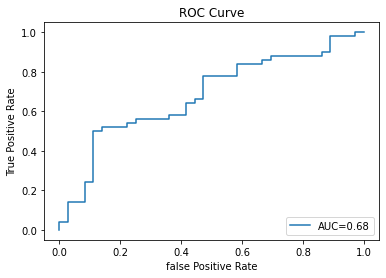

In [44]:
plt.plot(false_positive_rate, true_positive_rate,label = 'AUC=' +str(auc))
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('false Positive Rate')
plt.legend(loc = 4)